In [83]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play

filepath = "../lido/experiments/axis-uat/data/raw/8-audio/11354.wav"

In [84]:
# Play audio

play(AudioSegment.from_file(filepath))

In [85]:
# Audio signal

y, sr = librosa.load(filepath, sr=None)
print(len(y), sr)
print(y[:10])

42560 8000
[-0.00366211 -0.00317383 -0.00219727  0.00366211  0.00756836  0.00756836
  0.0065918   0.00512695  0.00415039  0.00219727]


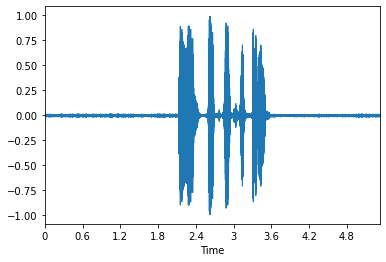

In [86]:
# Waveform of a signal

# y, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr=sr)

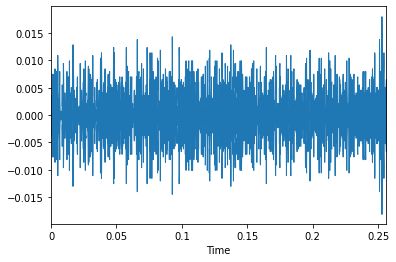

In [92]:
# Waveform of a frame

n_fft = 2048
librosa.display.waveplot(y[:2048], sr=sr)

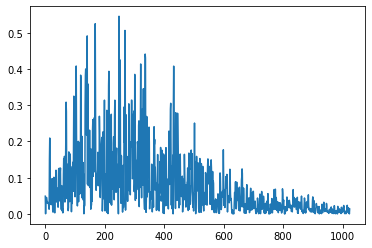

In [93]:
# DFT of a frame

n_fft = 2048
D = np.abs(librosa.stft(y[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D)

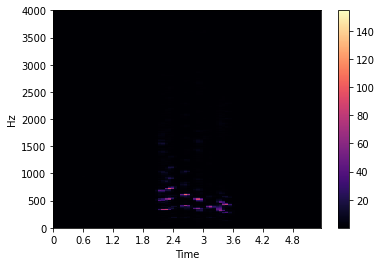

In [94]:
# STFT of a signal

hop_length = 512
D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar()

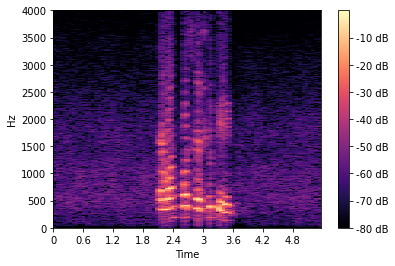

In [95]:
# Spectogram

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear');
plt.colorbar(format='%+2.0f dB')

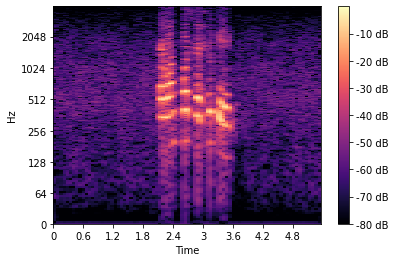

In [96]:
# Log Spectogram

librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB')

In [98]:
# Mel filters

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

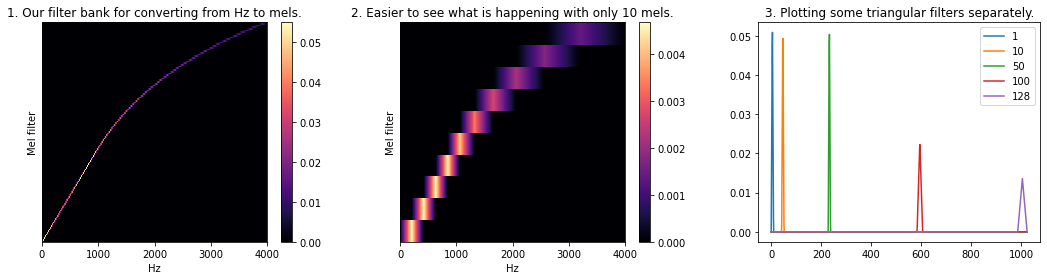

In [99]:

plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();

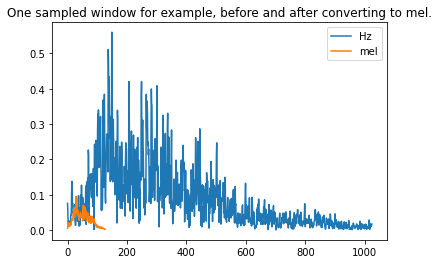

In [100]:
# Applying the Mel filter

plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
# print(D[:,1])
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

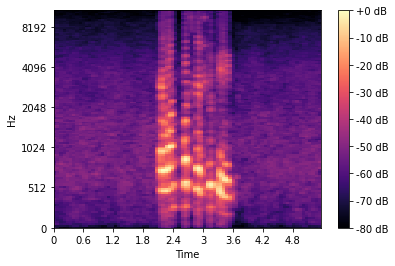

In [101]:
# MEL Log Spectogram

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [ ]:
# Sanity check 

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
fft_windows = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

assert (mel.dot(magnitude) == S).all()

In [ ]:
# Formants

plt.plot(D[:, 1]);

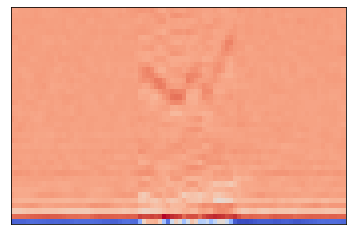

In [102]:
# MFCC

n_mfcc = 40
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
librosa.display.specshow(mfcc)